In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [109]:
# Read IMDb Basics & Ratings datasets
# The basics includes 9 features for 7 million titles

# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

basics_tsv_file ="C:\\Users\.....\Downloads\\basics1.tsv"
basics = pd.read_csv(basics_tsv_file, sep='\t',low_memory=False)
basics.shape

(7001594, 9)

In [110]:
# There are 1 million movies in the ratings datasets
# The ratings includes 3 features for 1 million titles

#title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
#tconst (string) - alphanumeric unique identifier of the title
#averageRating – weighted average of all the individual user ratings
#numVotes - number of votes the title has received
ratings_tsv_file = "C:\\Users\.....\Downloads\\ratings1.tsv"
ratings = pd.read_csv(ratings_tsv_file, sep='\t')

ratings.shape

(1055773, 3)

In [111]:
# Merge IMDb Basics & Ratings datasets by tconst
# The new dataset has 1 million movies
data = pd.merge(basics, ratings, on ="tconst")
data.shape

(1055773, 11)

In [46]:
data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1634
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,197
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1326
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,119
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2107
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.2,114
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.5,647
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,1792
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.9,153
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.9,5972


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055773 entries, 0 to 1055772
Data columns (total 11 columns):
tconst            1055773 non-null object
titleType         1055773 non-null object
primaryTitle      1055773 non-null object
originalTitle     1055773 non-null object
isAdult           1055773 non-null int64
startYear         1055773 non-null object
endYear           1055773 non-null object
runtimeMinutes    1055773 non-null object
genres            1055771 non-null object
averageRating     1055773 non-null float64
numVotes          1055773 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 96.7+ MB


In [48]:
data.describe(include= "all")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
count,1055773,1055773,1055773,1055773,1.055773e+06,1055773,1055773,1055773,1055771,1.055773e+06,1.055773e+06
unique,1055773,10,807361,819127,NaN,141,77,676,1967,NaN,NaN
top,tt0028221,tvEpisode,Episode #1.1,Episode #1.1,NaN,2017,\N,\N,Comedy,NaN,NaN
freq,1,478368,3264,3264,NaN,48858,1030984,287395,93005,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.142885e-02,NaN,NaN,NaN,NaN,6.886515e+00,9.620326e+02
std,NaN,NaN,NaN,NaN,2.778506e+00,NaN,NaN,NaN,NaN,1.398586e+00,1.592916e+04
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,5.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,6.100000e+00,9.000000e+00
50%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,7.100000e+00,2.000000e+01
75%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,7.900000e+00,7.900000e+01


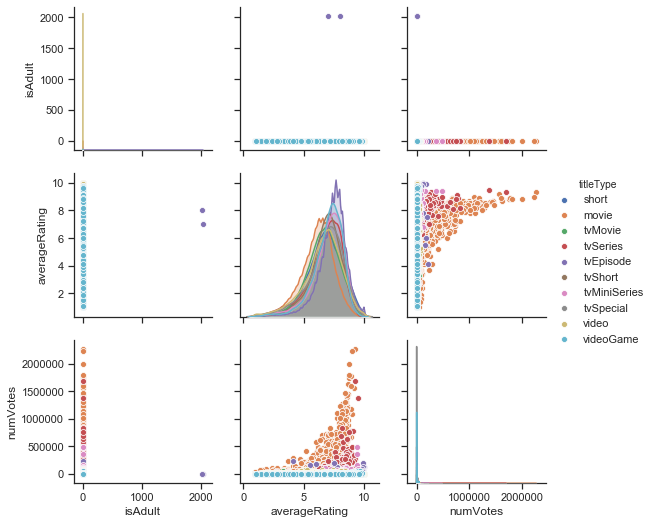

In [50]:
# Pair plots - scatterplots for joint relationships and histograms for univariate distributions
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue= 'titleType')

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb Title Types')

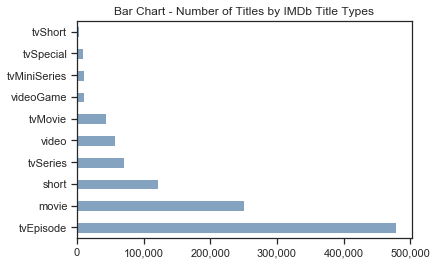

In [51]:
# Distribution of the 10 Title Types (bar chart)
import matplotlib.pyplot as plt
ax = data['titleType'].value_counts().plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
import matplotlib.ticker as mtick
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks()

plt.title('Bar Chart - Number of Titles by IMDb Title Types')

Text(0.5, 1.0, 'Pie Chart - Number of Titles by IMDb Title Types')

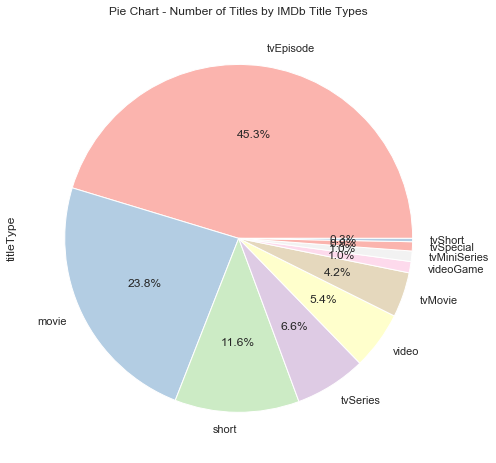

In [54]:
# Distribution of the 10 Title Types (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['titleType'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Number of Titles by IMDb Title Types')

In [55]:
# Check genres 
data['genres'].value_counts().head()

Comedy                        93005
Drama                         79276
Documentary                   58816
Action,Adventure,Animation    29262
Reality-TV                    23853
Name: genres, dtype: int64

Text(0.5, 1.0, 'Pie Chart - Number of Titles by IMDb genres')

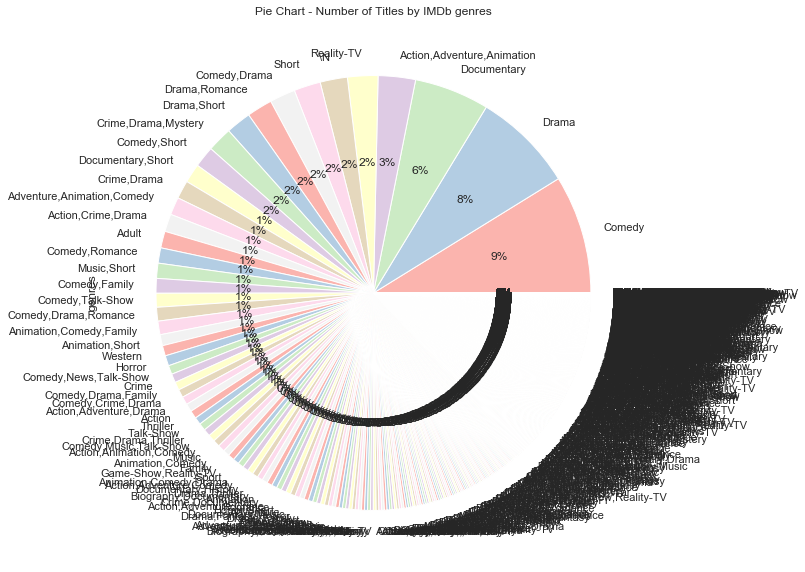

In [56]:
# Distribution of the 10 genres (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['genres'].value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(10, 10), colors=colors)
plt.title('Pie Chart - Number of Titles by IMDb genres')

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb genres')

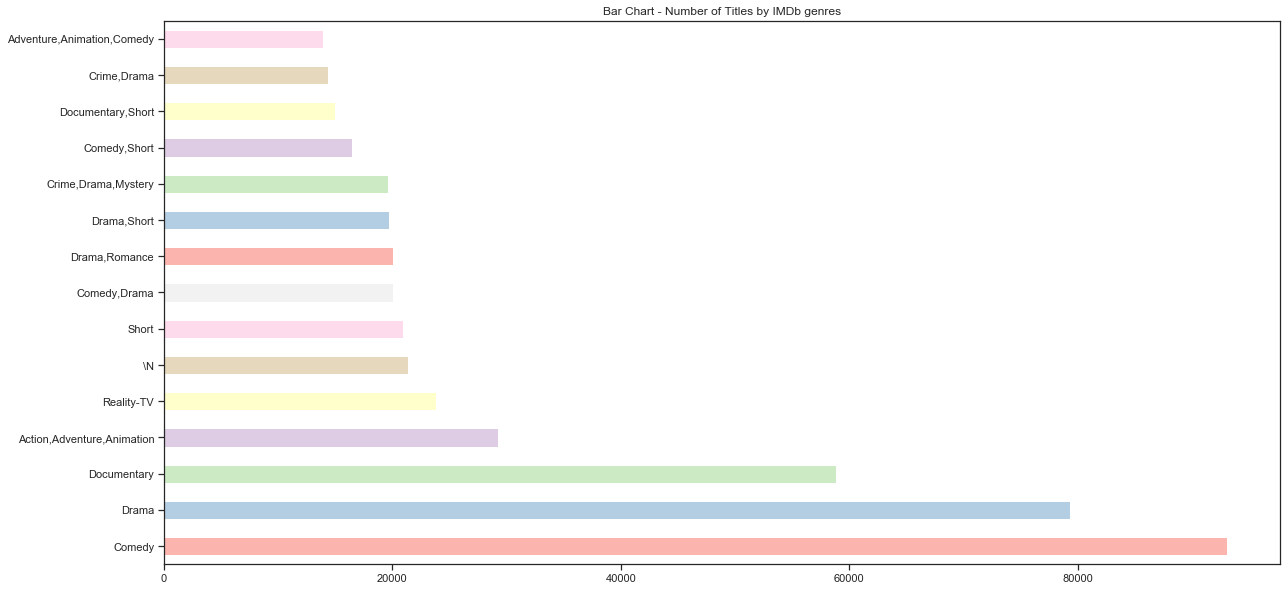

In [58]:
# Distribution of the 10 Title Types (bar chart)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

import matplotlib.pyplot as plt
ax = data['genres'].value_counts().head(15).plot(kind='barh', figsize=(20,10), color=colors)
# color=(0.2, 0.4, 0.6, 0.6),
plt.title('Bar Chart - Number of Titles by IMDb genres')

In [61]:
# Lesson learned 1: can't use astype where NaN's are applicable
# Instead, use pd.to_numeric & pd.to_datetime
# Lesson learned 2: had i transformed the types without looking into the details, i would've transfered
# the incorrect 2014 and 2019 into isAdult 1
# Just keep the isAdult as is...
data['isAdult']=data['isAdult'].astype('bool')
data['runtimeMinutes']= pd.to_numeric(data['runtimeMinutes'], errors='coerce')
data['startYear']= pd.to_datetime(data['startYear'], errors='coerce')
data['endYear']= pd.to_datetime(data['endYear'], errors='coerce')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055773 entries, 0 to 1055772
Data columns (total 11 columns):
tconst            1055773 non-null object
titleType         1055773 non-null object
primaryTitle      1055773 non-null object
originalTitle     1055773 non-null object
isAdult           1055773 non-null bool
startYear         1055635 non-null datetime64[ns]
endYear           24789 non-null datetime64[ns]
runtimeMinutes    768376 non-null float64
genres            1055771 non-null object
averageRating     1055773 non-null float64
numVotes          1055773 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 89.6+ MB


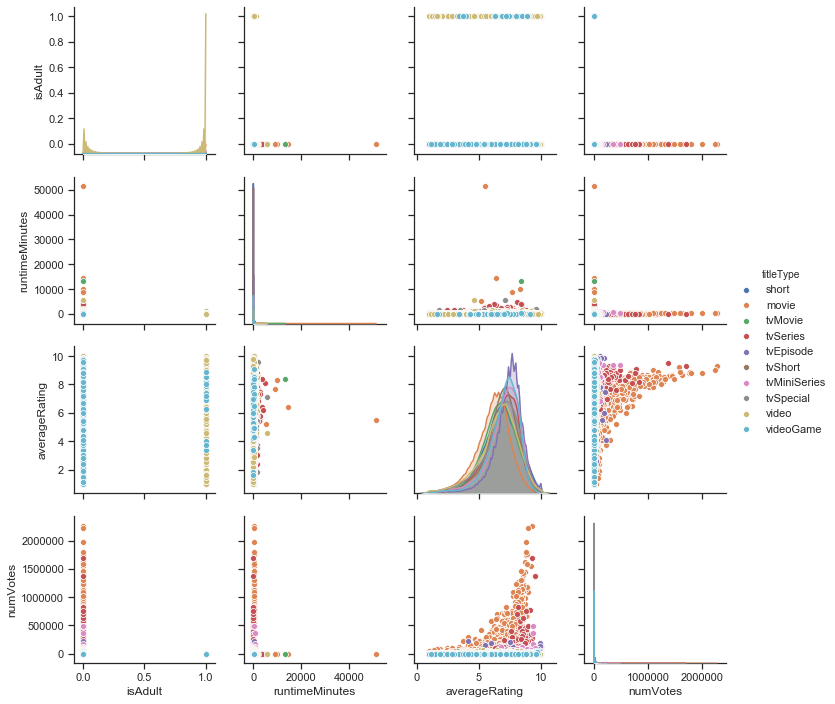

In [63]:
# Pair plots - scatterplots for joint relationships and histograms for univariate distributions
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue= 'titleType')

Text(0.5, 1.0, 'Pie Chart - Adult Titles or Not')

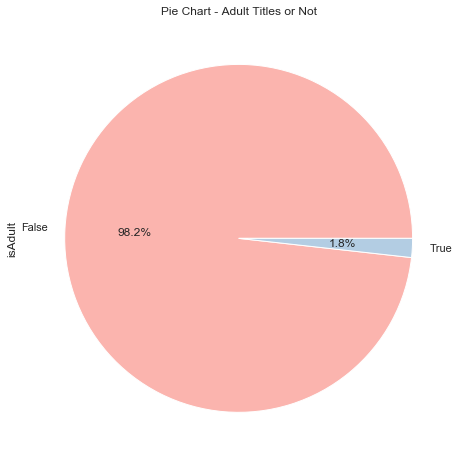

In [105]:
# Distribution of Adult movies (pie chart)
# 98.2% of the movies are not Adult ones
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['isAdult'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Adult Titles or Not')

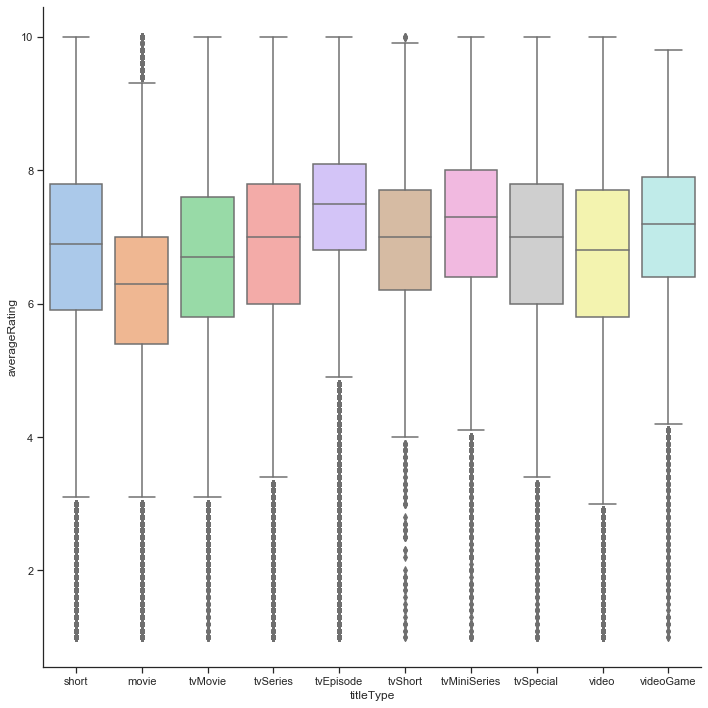

In [112]:
# Distribution of the averageRating
# Skewed to the left
sns.catplot(x="titleType", y="averageRating", hue="titleType", height =10, palette="pastel",
            kind="box", dodge=False, data=data);